 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
pwd

'C:\\Users\\jenni\\Homework\\Jupyter-Workspace\\Homework\\Homework3_Pandas'

In [ ]:
# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [169]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")

whale_returns = pd.read_csv(whale_returns_csv, index_col='Date', parse_dates=True)
whale_returns = whale_returns.sort_index()
whale_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [170]:
# Count nulls
whale_returns.count()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [172]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [175]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col='Date', parse_dates=True)
algo_returns = algo_returns.sort_index()

algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [176]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [177]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [310]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col='Date', parse_dates=True)
sp500_history = sp500_history.sort_index()

sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [311]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [312]:
# Fix Data Types
sp500_history['Close'] = sp500_history['Close'].str.replace('$', '')
sp500_history['Close'] = sp500_history['Close'].astype('float')

In [313]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [455]:
# Drop nulls
sp500_daily_returns.dropna()
sp500_daily_returns.head()

,S&P 500
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [315]:
# Rename Column

sp500_daily_returns = sp500_daily_returns.rename(columns={"Close":"S&P 500"})
sp500_daily_returns.tail()


,S&P 500
Date,
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579
2019-04-22,0.001012
2019-04-23,0.008841


## Combine Whale, Algorithmic, and S&P 500 Returns

In [476]:
# Concatenate all DataFrames into a single DataFrame
combined_returns_df = pd.concat([whale_returns, algo_returns, sp500_daily_returns], axis="columns", join="inner") 
combined_returns_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

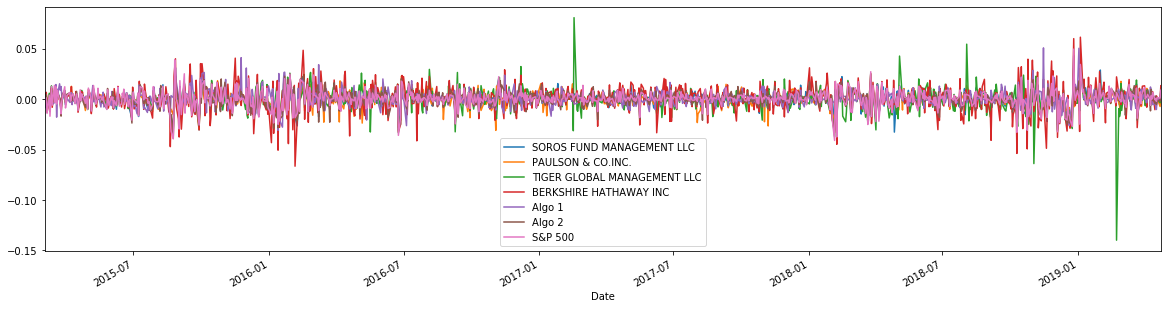

In [317]:
# Plot daily returns
combined_returns_df.plot(figsize=(20,5))

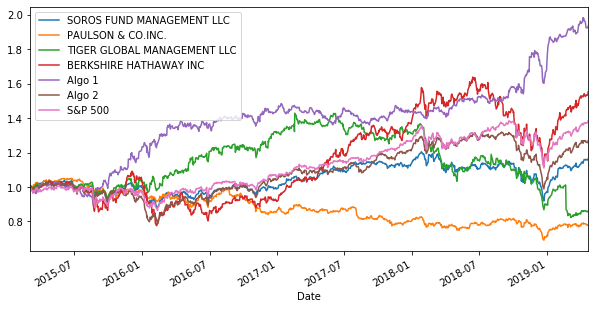

In [318]:
# Plot cumulative returns
cumulative_returns = (1 + combined_returns_df).cumprod()
cumulative_returns.plot(figsize=(10,5))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

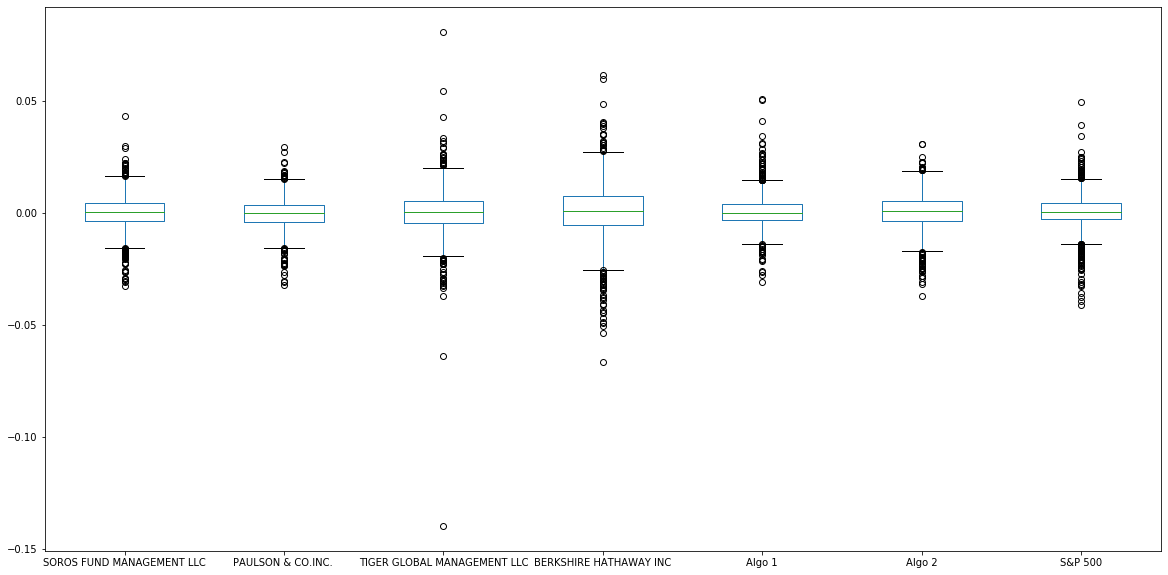

In [319]:
# Box plot to visually show risk
combined_returns_df.plot.box(figsize=(20,10))

In [320]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
combined_daily_std = combined_returns_df.std()
combined_daily_std


SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [321]:
# Determine which portfolios are riskier than the S&P 500
riskier = combined_daily_std.gt(combined_daily_std[6])
riskier

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [322]:
# Calculate the annualized standard deviation (252 trading days)
combined_annualized_std = combined_daily_std * np.sqrt(252)
combined_annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&P 500

In [403]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
SP500_rolling_std = combined_returns_df["S&P 500"].rolling(window=21).std()
SP500_rolling_std


Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.006498
2019-04-17    0.006537
2019-04-18    0.006470
2019-04-22    0.006094
2019-04-23    0.004325
Name: S&P 500, Length: 1043, dtype: float64

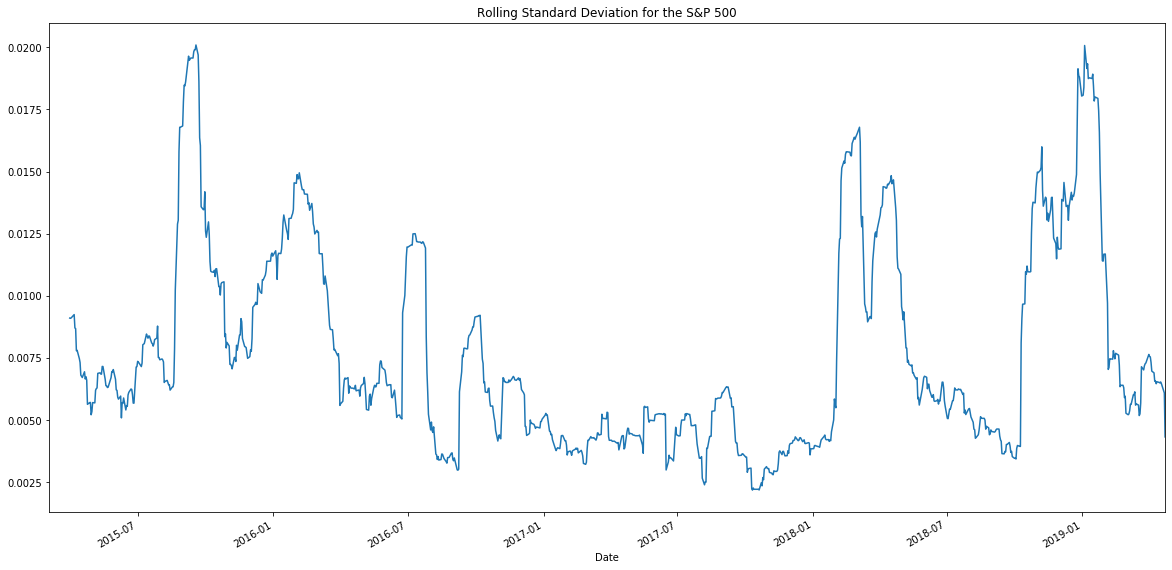

In [466]:
SP500_rolling_std.plot(figsize=(20,10), title = "Rolling Standard Deviation for the S&P 500")

In [411]:
# Correlation
correlation = combined_returns_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [417]:
#strong correlation to the S&P 500, assuming greater than 0.70
correlation_to_SP500 = correlation.iloc[:,6]
strong_correlation = correlation_to_SP500.gt(0.70)
strong_correlation

SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC    False
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                          True
S&P 500                         True
Name: S&P 500, dtype: bool

In [327]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
covariance_berkshire = combined_returns_df['BERKSHIRE HATHAWAY INC'].cov(combined_returns_df['S&P 500'])
variance_sp500 = combined_returns_df['S&P 500'].var()
berkshire_beta = covariance_berkshire/variance_sp500
print(f"Berkshire Hathaway Inc Beta: {berkshire_beta}")

Berkshire Hathaway Inc Beta: 1.1347891297491723


In [468]:
# Calculate 60-day rolling covariance of Berkshire vs. S&P 500 
rolling_berkshire_covariance = combined_returns_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_returns_df['S&P 500'])

# Calculate 60-day rolling variance of the S&P 500 
rolling_variance = combined_returns_df['S&P 500'].rolling(window=60).var()

# Calculate 60-day rolling beta of Berkshire vs S&P 500 
rolling_berkshire_beta = rolling_berkshire_covariance / rolling_variance
rolling_berkshire_beta.tail()

Date
2019-04-16    1.337986
2019-04-17    1.301791
2019-04-18    1.302226
2019-04-22    1.304125
2019-04-23    1.278284
dtype: float64

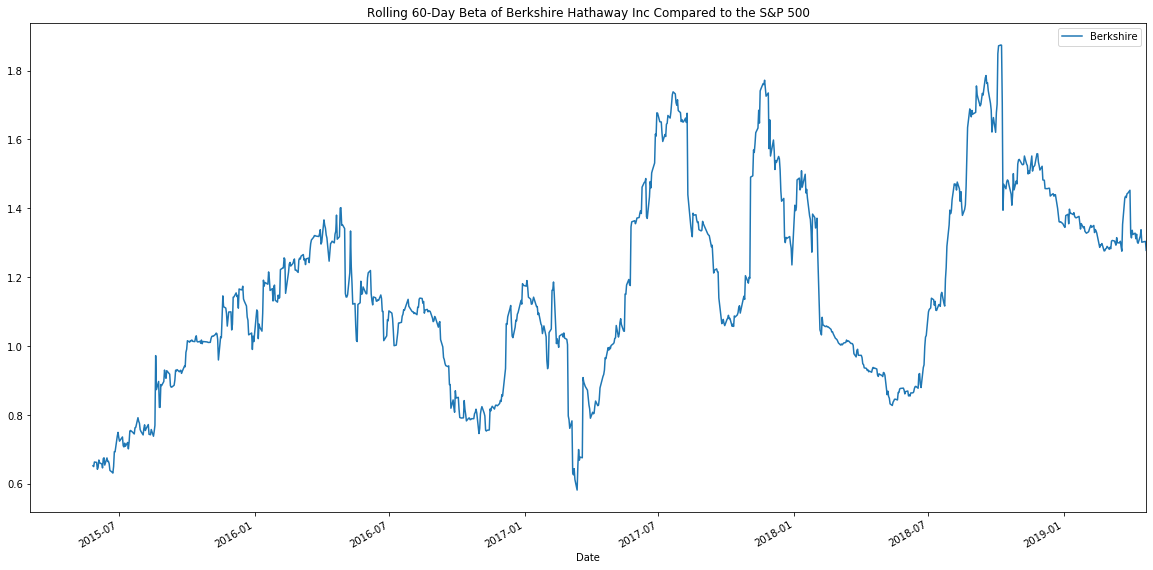

In [418]:
ax = rolling_berkshire_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Berkshire Hathaway Inc Compared to the S&P 500')

# Set the legend of the figure
ax.legend(["Berkshire"])

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

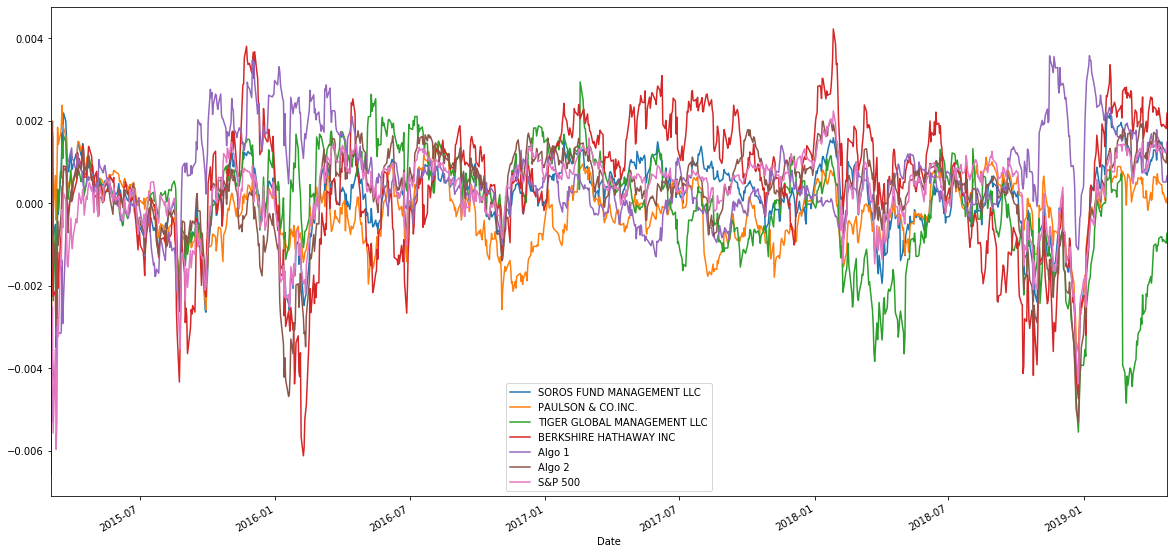

In [475]:
EWM = combined_returns_df.ewm(halflife=21).mean()
EWM.plot(figsize = (20,10))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [454]:
# Annualzied Sharpe Ratios
sharpe_ratios = (combined_returns_df.mean() * 252) / (combined_returns_df.std() * np.sqrt(252))
sharpe_ratios.sort_values(ascending=False)

Algo 1                         1.378648
S&P 500                        0.648267
BERKSHIRE HATHAWAY INC         0.621810
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
PAULSON & CO.INC.             -0.483570
dtype: float64

In [ ]:
#Algo 1 has the highest risk adjusted returns 

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

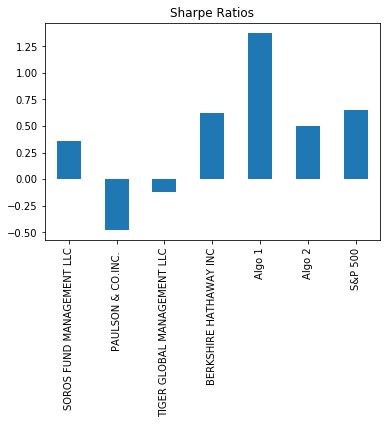

In [399]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")


---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [331]:
# Read the first stock
# Reading Zebra Closing Prices
zebra_history_csv = Path("C:/Users/jenni/Jupyter-Workspace/Homework/Homework3_Pandas/Resources/ZBRAHistoricalNOCP1y.csv")


In [332]:
zebra_price = pd.read_csv(zebra_history_csv, index_col='Trade DATE', parse_dates=True)

#rename NOCP with symbol name
zebra_price = zebra_price.rename(columns={"NOCP":"ZBRA"})

# Drop symbol column
zebra_price = zebra_price.drop(columns=['Symbol'])

# Drop missing values
zebra_price = zebra_price.dropna()

# Sort the dates in ascending order
zebra_price = zebra_price.sort_index()

zebra_price.head()

,ZBRA
Trade DATE,
2018-09-14,178.70
2018-09-17,175.65
2018-09-18,176.26
2018-09-19,172.70
2018-09-20,174.78


In [333]:
# Read the second stock
# Reading MSFT Closing Prices
msft_history_csv = Path("C:/Users/jenni/Jupyter-Workspace/Homework/Homework3_Pandas/Resources/MSFTHistoricalNOCP1y.csv")
msft_price = pd.read_csv(msft_history_csv, index_col='Trade DATE', parse_dates=True)
msft_price.head()

,Symbol,NOCP
Trade DATE,,
2019-09-12,MSFT,137.52
2019-09-11,MSFT,136.12
2019-09-10,MSFT,136.08
2019-09-09,MSFT,137.52
2019-09-06,MSFT,139.10


In [334]:
#rename NOCP with symbol name
msft_price = msft_price.rename(columns={"NOCP":"MSFT"})

# Drop symbol column
msft_price = msft_price.drop(columns=['Symbol'])

# Drop missing values
msft_price = msft_price.dropna()

# Sort the dates in ascending order
msft_price = msft_price.sort_index()

msft_price.head()


,MSFT
Trade DATE,
2018-09-14,113.37
2018-09-17,112.14
2018-09-18,113.21
2018-09-19,111.70
2018-09-20,113.57


In [335]:
# Read the third stock

# Reading AMZN Closing Prices
amzn_history_csv = Path("C:/Users/jenni/Jupyter-Workspace/Homework/Homework3_Pandas/Resources/AMZNHistoricalNOCP1y.csv")
amzn_price = pd.read_csv(amzn_history_csv, index_col='Trade DATE', parse_dates=True)
amzn_price.head()

,Symbol,NOCP
Trade DATE,,
2019-09-12,AMZN,1843.55
2019-09-11,AMZN,1822.99
2019-09-10,AMZN,1820.55
2019-09-09,AMZN,1831.35
2019-09-06,AMZN,1833.51


In [336]:

#rename NOCP with symbol name
amzn_price = amzn_price.rename(columns={"NOCP":"AMZN"})

# Drop symbol column
amzn_price = amzn_price.drop(columns=['Symbol'])

# Drop missing values
amzn_price = amzn_price.dropna()

# Sort the dates in ascending order
amzn_price = amzn_price.sort_index()

amzn_price.head()

,AMZN
Trade DATE,
2018-09-14,1970.19
2018-09-17,1908.03
2018-09-18,1941.05
2018-09-19,1926.42
2018-09-20,1944.30


In [337]:
# Concatenate all stocks into a single DataFrame
JM_portfolio = pd.concat([zebra_price,msft_price, amzn_price], axis='columns', join='inner')
JM_portfolio.head()

,ZBRA,MSFT,AMZN
Trade DATE,,,
2018-09-14,178.70,113.37,1970.19
2018-09-17,175.65,112.14,1908.03
2018-09-18,176.26,113.21,1941.05
2018-09-19,172.70,111.70,1926.42
2018-09-20,174.78,113.57,1944.30


In [338]:
# Reset the index
JM_portfolio = JM_portfolio.reset_index()

JM_portfolio.head()


,Trade DATE,ZBRA,MSFT,AMZN
0,2018-09-14,178.70,113.37,1970.19
1,2018-09-17,175.65,112.14,1908.03
2,2018-09-18,176.26,113.21,1941.05
3,2018-09-19,172.70,111.70,1926.42
4,2018-09-20,174.78,113.57,1944.30


In [339]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
JM_portfolio = JM_portfolio.set_index('Trade DATE')
JM_portfolio = JM_portfolio.sort_index()

JM_portfolio.head()


,ZBRA,MSFT,AMZN
Trade DATE,,,
2018-09-14,178.70,113.37,1970.19
2018-09-17,175.65,112.14,1908.03
2018-09-18,176.26,113.21,1941.05
2018-09-19,172.70,111.70,1926.42
2018-09-20,174.78,113.57,1944.30


In [340]:
# Drop Nulls
JM_portfolio.isnull().sum()

ZBRA    0
MSFT    0
AMZN    0
dtype: int64

In [341]:
JM_portfolio_returns = JM_portfolio.pct_change()
JM_portfolio_returns = JM_portfolio_returns.dropna()
JM_portfolio_returns.head()


,ZBRA,MSFT,AMZN
Trade DATE,,,
2018-09-17,-0.017068,-0.010849,-0.031550
2018-09-18,0.003473,0.009542,0.017306
2018-09-19,-0.020197,-0.013338,-0.007537
2018-09-20,0.012044,0.016741,0.009281
2018-09-21,0.002403,0.006076,-0.015065


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [342]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
JM_portfolio_total_returns = JM_portfolio_returns.dot(weights)
JM_portfolio_total_returns.head()


Trade DATE
2018-09-17   -0.019822
2018-09-18    0.010107
2018-09-19   -0.013691
2018-09-20    0.012689
2018-09-21   -0.002195
dtype: float64

In [343]:

#columns = ["Date", "JM Portfolio"]
#JM_portfolio_total_returns.columns = columns
JM_portfolio_total_returns.columns = ["Date", "JM Portfolio"]
JM_portfolio_total_returns.head()


Trade DATE
2018-09-17   -0.019822
2018-09-18    0.010107
2018-09-19   -0.013691
2018-09-20    0.012689
2018-09-21   -0.002195
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [344]:
combined_returns_alldates_df = pd.concat([combined_returns_df, JM_portfolio_total_returns], axis="columns")
combined_returns_alldates_df.rename(columns={0:'Custom'}, inplace=True)
combined_returns_alldates_df.head()
                                     

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,NaN


In [345]:
# Only compare dates where the new, custom portfolio has dates
combined_returns_JM_df = pd.concat([combined_returns_df, JM_portfolio_total_returns], axis="columns", join="inner")
combined_returns_JM_df.rename(columns={0:'Custom'}, inplace=True)
combined_returns_JM_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2018-09-17,-0.007657,-0.006064,-0.008787,-0.021380,-0.005064,-0.003158,-0.005570,-0.019822
2018-09-18,0.007136,0.004387,-0.010175,0.007881,0.001882,0.003475,0.005369,0.010107
2018-09-19,0.002123,0.002673,-0.001223,0.005441,0.014688,-0.001396,0.001253,-0.013691
2018-09-20,0.004427,0.006203,0.009847,0.011431,0.011699,0.007725,0.007841,0.012689
2018-09-21,-0.001724,-0.000370,-0.006489,-0.001485,-0.004860,-0.003114,-0.000369,-0.002195


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [419]:
# Risk
combined_returns_JM_std = combined_returns_JM_df.std()
combined_returns_JM_std

SOROS FUND MANAGEMENT LLC      0.010795
PAULSON & CO.INC.              0.008515
TIGER GLOBAL MANAGEMENT LLC    0.016645
BERKSHIRE HATHAWAY INC         0.017760
Algo 1                         0.010024
Algo 2                         0.010310
S&P 500                        0.011398
Custom                         0.020719
dtype: float64

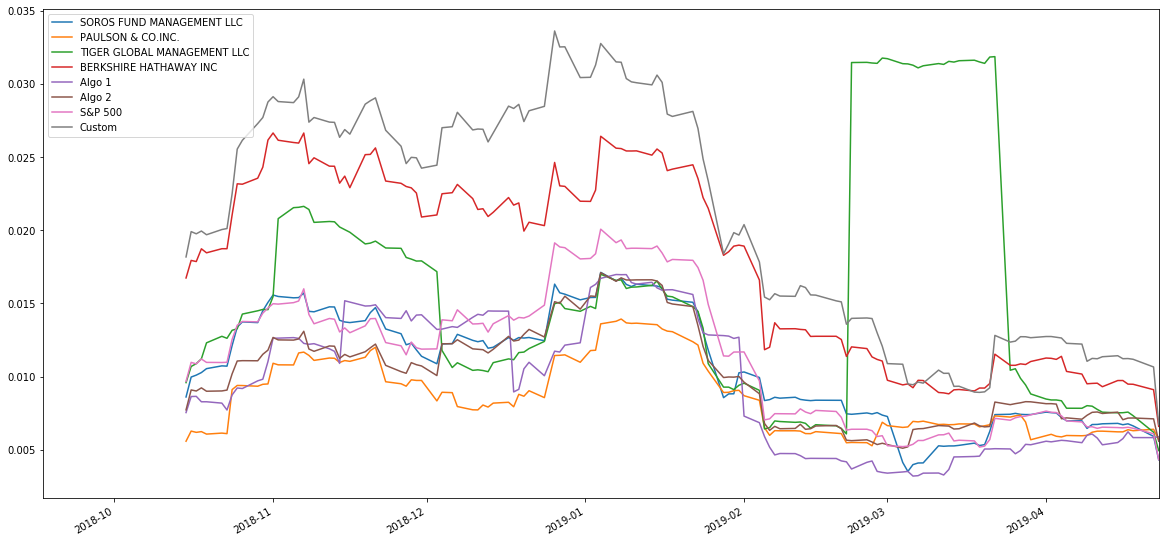

In [347]:
# Rolling
combined_returns_JM_df.rolling(window=21).std().plot(figsize=(20,10))

In [351]:
# Beta
covariance_JM = combined_returns_JM_df['Custom'].cov(combined_returns_JM_df['S&P 500'])
variance_sp500 = combined_returns_JM_df['S&P 500'].var()
JM_beta = covariance_JM/variance_sp500
print(f"JM Portfolio Beta: {JM_beta}")

JM Portfolio Beta: 1.6537589024150376


In [423]:
# Annualized Sharpe Ratios
sharpe_ratios_JM = (combined_returns_JM_df.mean() * 252) / (combined_returns_JM_df.std() * np.sqrt(252))
#ranked from best to worst sharpe ratios 
sharpe_ratios_JM.sort_values(ascending=False)

Algo 1                         2.592985
Custom                         0.790971
BERKSHIRE HATHAWAY INC         0.617655
SOROS FUND MANAGEMENT LLC      0.268072
S&P 500                        0.181154
Algo 2                        -0.225238
PAULSON & CO.INC.             -0.433584
TIGER GLOBAL MANAGEMENT LLC   -1.706563
dtype: float64

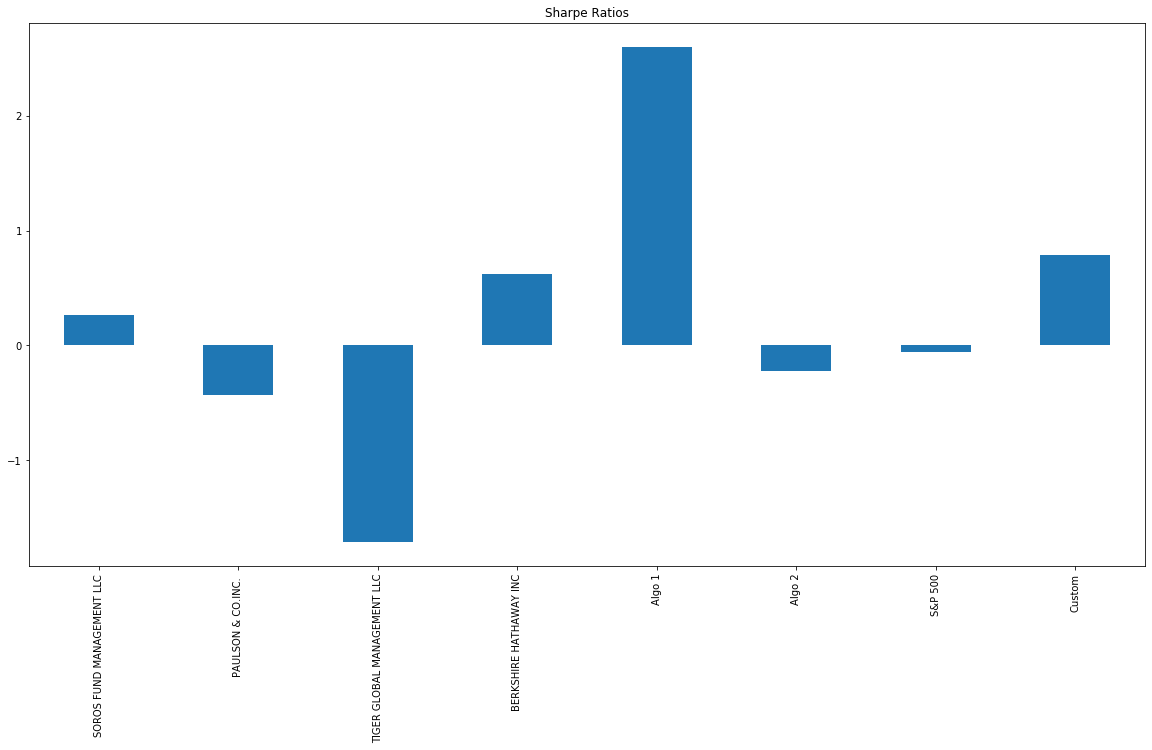

In [352]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_JM.plot(kind="bar", title="Sharpe Ratios", figsize=(20,10))

## Include correlation analysis to determine which stocks (if any) are correlated

In [430]:
#correlation for all portfolios 
correlation_JM = combined_returns_JM_df.corr()
correlation_JM

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.819823,0.487520,0.853165,0.391152,0.881430,0.894969,0.832391
PAULSON & CO.INC.,0.819823,1.000000,0.478911,0.704216,0.436635,0.825978,0.793014,0.714598
TIGER GLOBAL MANAGEMENT LLC,0.487520,0.478911,1.000000,0.349496,0.165415,0.404113,0.487296,0.356833
BERKSHIRE HATHAWAY INC,0.853165,0.704216,0.349496,1.000000,0.399863,0.820409,0.882108,0.897040
Algo 1,0.391152,0.436635,0.165415,0.399863,1.000000,0.438933,0.344039,0.336933
Algo 2,0.881430,0.825978,0.404113,0.820409,0.438933,1.000000,0.893600,0.845148
S&P 500,0.894969,0.793014,0.487296,0.882108,0.344039,0.893600,1.000000,0.909764
Custom,0.832391,0.714598,0.356833,0.897040,0.336933,0.845148,0.909764,1.000000


In [431]:
#Correlation of custom portfolio to the S&P500 
custom_correlation = correlation_JM.iloc[-1:,6]
custom_correlation

Custom    0.909764
Name: S&P 500, dtype: float64

In [451]:
#comparing each stock in the custom portfolio to the S&P500
custom_stock_df = pd.concat([sp500_daily_returns, JM_portfolio_returns], axis="columns", join="inner")
correlation_custom_stocks = custom_stock_df.corr()
correlation_custom_stocks

,S&P 500,ZBRA,MSFT,AMZN
S&P 500,1.000000,0.771146,0.868748,0.836342
ZBRA,0.771146,1.000000,0.708329,0.659191
MSFT,0.868748,0.708329,1.000000,0.819879
AMZN,0.836342,0.659191,0.819879,1.000000


In [452]:
strong_correlation_custom_stocks = correlation_custom_stocks.iloc[:,0]
strong_correlation_custom_stocks

S&P 500    1.000000
ZBRA       0.771146
MSFT       0.868748
AMZN       0.836342
Name: S&P 500, dtype: float64

In [453]:
strong_correlation = strong_correlation_custom_stocks.gt(0.70)
strong_correlation
#all stocks in the custom portfolio are highly correlated to the S&P500 

S&P 500    True
ZBRA       True
MSFT       True
AMZN       True
Name: S&P 500, dtype: bool